In [1]:
##############################################
# FEATURE ENGINEERING & DATA PRE-PROCESSING
##############################################


import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#! =pip install missingno:missingno eksik veri (missing values) görselleştirmesi için hızlı, kullanışlı bir araçtır.

import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


In [2]:
def load():
    data = pd.read_csv("dataset/heart.csv")
    return data

In [3]:
df = load()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000,Up,0


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Nunique #####################")
    print(df.nunique().sort_values())

In [5]:
check_df(df)

##################### Shape #####################
(918, 12)
##################### Types #####################
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
##################### Head #####################
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0   40   M           ATA        140          289          0     Normal    172              N    0.000       Up             0
1   49   F           NAP        160          180          0     Normal    156              N    1.000     Flat             1
2   37   M           ATA        130          283          0         ST     98              N    0.000       Up             0
3   48   F     

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_27576\1990393606.py:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Sayısal Değişkenlerin Dağılımı (Histogram)
df.hist(bins=20, figsize=(15, 10), color='teal')
plt.suptitle("Sayısal Değişkenlerin Dağılım Grafikleri")
plt.show()

# 2. Korelasyon Isı Haritası (Heatmap)
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr() # Sadece sayısal sütunlar için
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title("Değişkenler Arası Korelasyon Isı Haritası")
plt.show()

In [21]:
df.describe().style.background_gradient()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
import numpy as np

# 1. Adım: 0 olan hatalı değerleri NaN (boş değer) ile değiştirelim
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)

# 2. Adım: Gerçekten kaç tane boş değerimiz oluştuğunu görelim
print("Düzeltilmesi gereken (NaN yapılan) değer sayısı:")
print(df[['Cholesterol', 'RestingBP']].isnull().sum())

Düzeltilmesi gereken (NaN yapılan) değer sayısı:
Cholesterol    172
RestingBP        1
dtype: int64


--- Kolesterolü 0 Olan Hastaların Durumu ---
              Kişi Sayısı  Yüzde (%)
Hasta (1)             152     88.372
Sağlıklı (0)           20     11.628


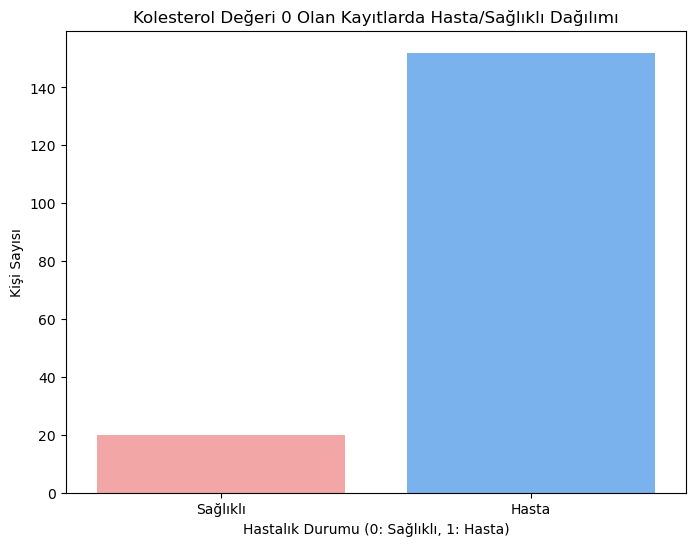

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Kolesterol değeri 0 olan kayıtları filtreleyelim
cholesterol_zero = df[df['Cholesterol'] == 0]

# 2. Bu kayıtlar içindeki Hasta (1) ve Sağlıklı (0) sayılarını hesaplayalım
status_counts = cholesterol_zero['HeartDisease'].value_counts()
status_ratios = cholesterol_zero['HeartDisease'].value_counts(normalize=True) * 100

# 3. Sonuçları tablo olarak yazdıralım
print("--- Kolesterolü 0 Olan Hastaların Durumu ---")
summary_df = pd.DataFrame({
    'Kişi Sayısı': status_counts,
    'Yüzde (%)': status_ratios
})
summary_df.index = ['Hasta (1)', 'Sağlıklı (0)']
print(summary_df)

# 4. Görselleştirme (Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=cholesterol_zero, palette=['#FF9999', '#66B2FF'])
plt.title('Kolesterol Değeri 0 Olan Kayıtlarda Hasta/Sağlıklı Dağılımı')
plt.xlabel('Hastalık Durumu (0: Sağlıklı, 1: Hasta)')
plt.ylabel('Kişi Sayısı')
plt.xticks([0, 1], ['Sağlıklı', 'Hasta'])
plt.show()

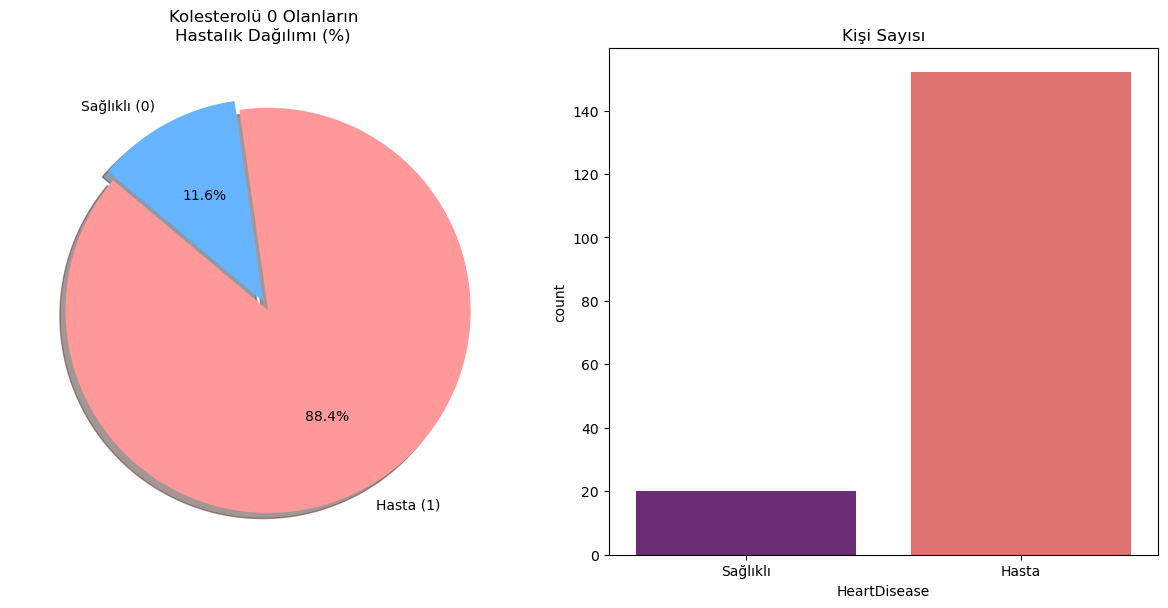

--- Kolesterolü 0 Olan Kayıtların Özeti ---
   Sayı  Yüzde
1   152 88.370
0    20 11.630


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Kolesterolü 0 olanları filtrele (Eğer NaN yaptıysan df['Cholesterol'].isna() kullan)
chol_zero = df[df['Cholesterol'] == 0]

if len(chol_zero) > 0:
    # 2. Verileri hazırla
    counts = chol_zero['HeartDisease'].value_counts()
    # 1: Hasta, 0: Sağlıklı eşleşmesi
    labels = counts.index.map({1: 'Hasta (1)', 0: 'Sağlıklı (0)'})
    colors = ['#ff9999','#66b3ff'] # Kırmızımsı ve Mavimsi

    # 3. Görselleştirme
    plt.figure(figsize=(12, 6))

    # Pasta Grafiği (Yüzdeli)
    plt.subplot(1, 2, 1)
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, 
            colors=colors, explode=(0.05, 0), shadow=True)
    plt.title('Kolesterolü 0 Olanların\nHastalık Dağılımı (%)')

    # Sütun Grafiği (Sayısal)
    plt.subplot(1, 2, 2)
    sns.countplot(x='HeartDisease', data=chol_zero, palette='magma')
    plt.title('Kişi Sayısı')
    plt.xticks([0, 1], ['Sağlıklı', 'Hasta'])

    plt.tight_layout()
    plt.show()

    # 4. İstatistiksel Tablo
    print("--- Kolesterolü 0 Olan Kayıtların Özeti ---")
    summary = pd.DataFrame({'Sayı': counts, 'Yüzde': (counts/counts.sum()*100).round(2)})
    print(summary)
else:
    print("0 değerli kayıt bulunamadı. Veriyi zaten temizlemiş olabilirsiniz.")

In [50]:
# Kan basıncındaki tek hatalı veriyi düzeltme
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df['RestingBP'].median()

# Kolesterol için eksik veri göstergesi oluşturma ve NaN atama
df['Cholesterol_Is_Missing'] = (df['Cholesterol'] == 0).astype(int)
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['Cholesterol'] = df.groupby('Sex')['Cholesterol'].transform(lambda x: x.fillna(x.median()))

In [51]:
check_df(df)

##################### Shape #####################
(918, 13)
##################### Types #####################
Age                         int64
Sex                        object
ChestPainType              object
RestingBP                   int64
Cholesterol               float64
FastingBS                   int64
RestingECG                 object
MaxHR                       int64
ExerciseAngina             object
Oldpeak                   float64
ST_Slope                   object
HeartDisease                int64
Cholesterol_Is_Missing      int32
dtype: object
##################### Head #####################
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Cholesterol_Is_Missing
0   40   M           ATA        140      289.000          0     Normal    172              N    0.000       Up             0                       0
1   49   F           NAP        160      180.000          0     Normal    156          

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_30076\1990393606.py:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [7]:
df.describe().style.background_gradient()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Cholesterol_Is_Missing
count,918.000000,917.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,242.810458,0.233115,136.809368,0.887364,0.553377,0.000000
std,9.432617,17.999749,53.474043,0.423046,25.460334,1.066570,0.497414,0.000000
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,234.000000,0.000000,138.000000,0.600000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,0.000000


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_34156\1076720537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdBu')


<Axes: >

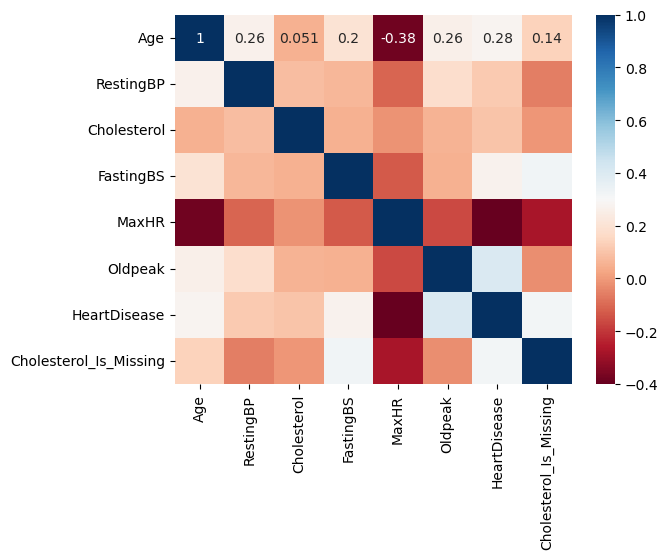

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

#  AYKIRI DEĞER


In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_Is_Missing
0,40,M,ATA,140,289.000,0,Normal,172,N,0.000,Up,0,0
1,49,F,NAP,160,180.000,0,Normal,156,N,1.000,Flat,1,0
2,37,M,ATA,130,283.000,0,ST,98,N,0.000,Up,0,0
3,48,F,ASY,138,214.000,0,Normal,108,Y,1.500,Flat,1,0
4,54,M,NAP,150,195.000,0,Normal,122,N,0.000,Up,0,0


In [7]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Nunique #####################")
    print(df.nunique().sort_values())

In [8]:
check_df(df)

##################### Shape #####################
(918, 13)
##################### Types #####################
Age                         int64
Sex                        object
ChestPainType              object
RestingBP                   int64
Cholesterol               float64
FastingBS                   int64
RestingECG                 object
MaxHR                       int64
ExerciseAngina             object
Oldpeak                   float64
ST_Slope                   object
HeartDisease                int64
Cholesterol_Is_Missing      int32
dtype: object
##################### Head #####################
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Cholesterol_Is_Missing
0   40   M           ATA        140      289.000          0     Normal    172              N    0.000       Up             0                       0
1   49   F           NAP        160      180.000          0     Normal    156          

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_30076\1990393606.py:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [11]:
# Değişken türlerinin ayrıştırılması
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=20)

In [21]:
cat_cols

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS',
 'HeartDisease',
 'Cholesterol_Is_Missing']

In [22]:
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [23]:
cat_but_car

[]

   Sex  Ratio
M  725 78.976
F  193 21.024
##########################################


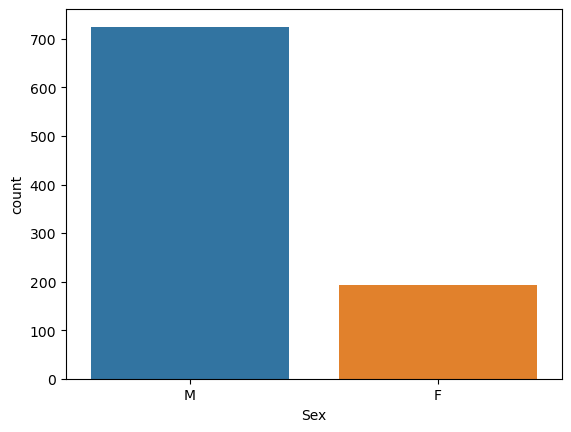

     ChestPainType  Ratio
ASY            496 54.031
NAP            203 22.113
ATA            173 18.845
TA              46  5.011
##########################################


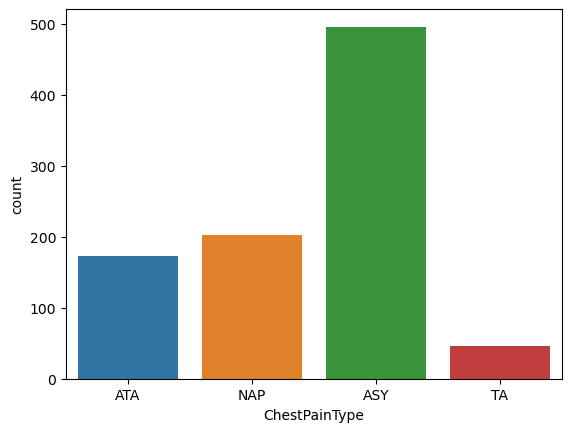

        RestingECG  Ratio
Normal         552 60.131
LVH            188 20.479
ST             178 19.390
##########################################


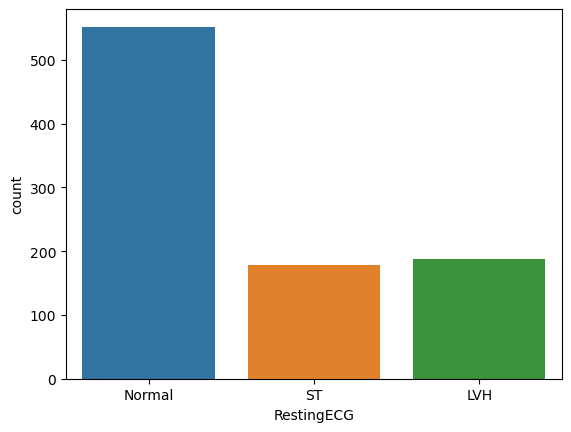

   ExerciseAngina  Ratio
N             547 59.586
Y             371 40.414
##########################################


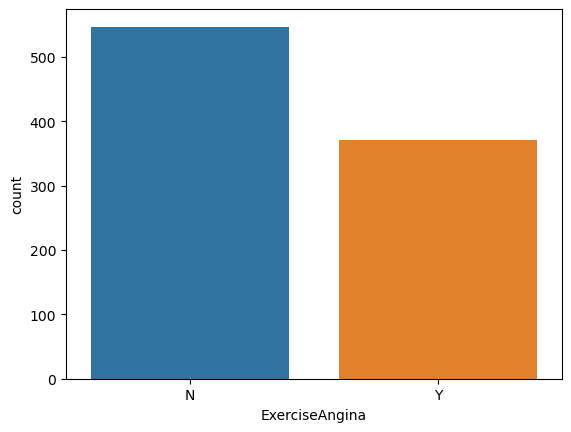

      ST_Slope  Ratio
Flat       460 50.109
Up         395 43.028
Down        63  6.863
##########################################


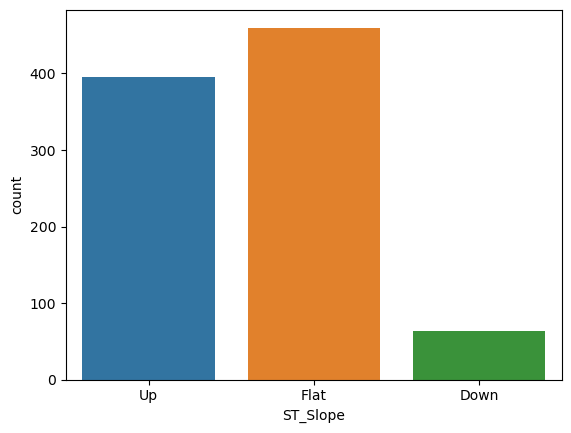

   FastingBS  Ratio
0        704 76.688
1        214 23.312
##########################################


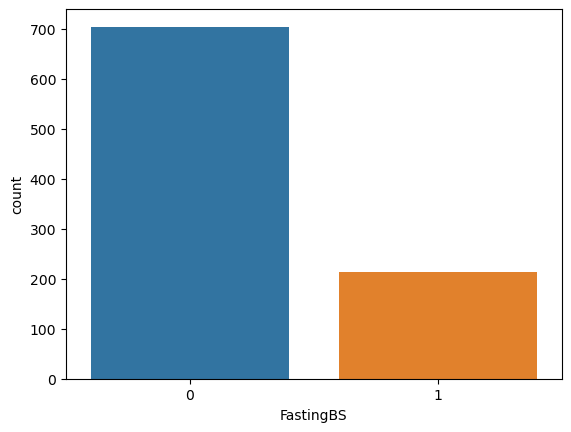

   HeartDisease  Ratio
1           508 55.338
0           410 44.662
##########################################


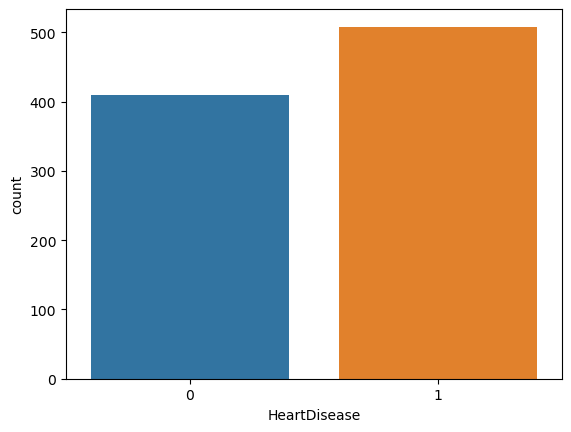

   Cholesterol_Is_Missing  Ratio
0                     746 81.264
1                     172 18.736
##########################################


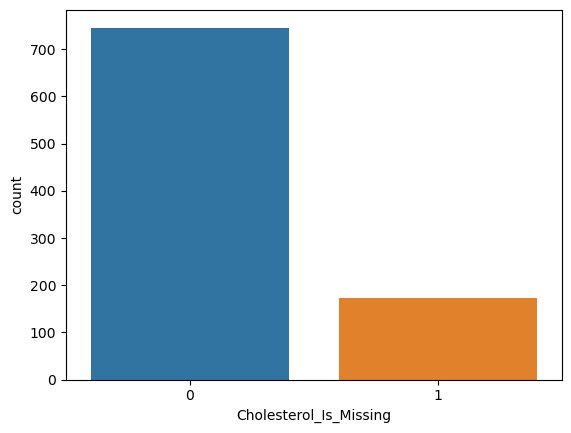

In [25]:
def cat_summary(dataframe, col_name, plot=True):
    # Frekans ve Oran Tablosu Oluşturma
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    
    # Görselleştirme (Plotting)
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

# Tüm kategorik değişkenler için döngü ile özet alma:
for col in cat_cols:
    cat_summary(df, col)


count   918.000
mean     53.511
std       9.433
min      28.000
5%       37.000
10%      40.000
20%      45.000
30%      49.000
40%      52.000
50%      54.000
60%      57.000
70%      59.000
80%      62.000
90%      65.000
95%      68.000
99%      74.000
max      77.000
Name: Age, dtype: float64


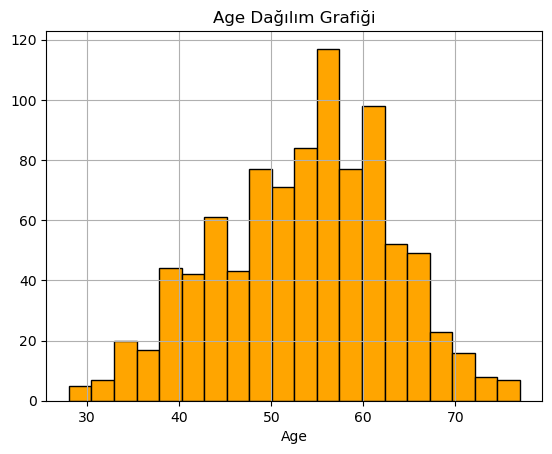

count   918.000
mean    132.538
std      17.990
min      80.000
5%      107.700
10%     110.000
20%     120.000
30%     120.000
40%     128.000
50%     130.000
60%     135.200
70%     140.000
80%     145.000
90%     160.000
95%     160.000
99%     180.000
max     200.000
Name: RestingBP, dtype: float64


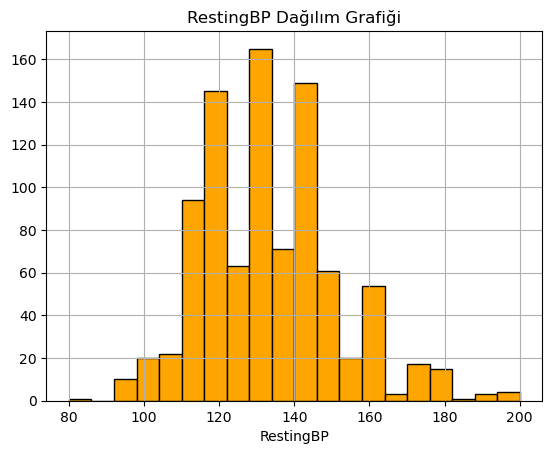

count   918.000
mean    242.810
std      53.474
min      85.000
5%      168.000
10%     186.000
20%     207.000
30%     221.000
40%     234.000
50%     234.000
60%     240.000
70%     257.000
80%     276.000
90%     305.000
95%     331.300
99%     411.490
max     603.000
Name: Cholesterol, dtype: float64


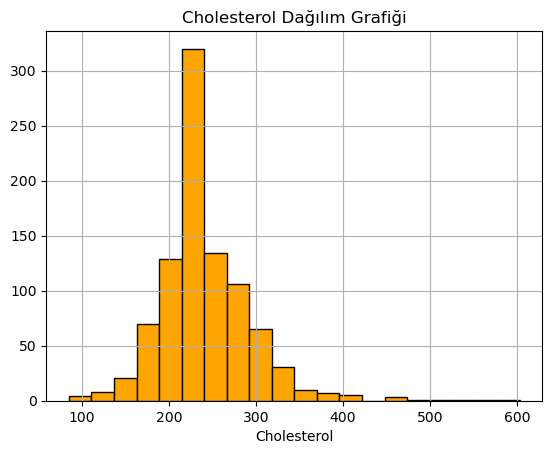

count   918.000
mean    136.809
std      25.460
min      60.000
5%       96.000
10%     103.000
20%     115.000
30%     122.000
40%     130.000
50%     138.000
60%     144.000
70%     151.000
80%     160.000
90%     170.000
95%     178.000
99%     186.000
max     202.000
Name: MaxHR, dtype: float64


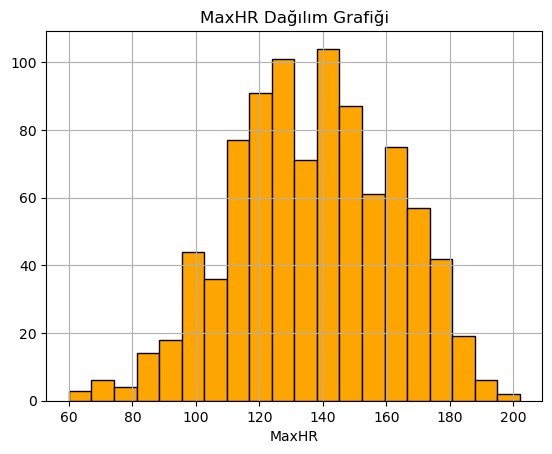

count   918.000
mean      0.887
std       1.067
min      -2.600
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       0.600
60%       1.000
70%       1.400
80%       1.800
90%       2.300
95%       3.000
99%       4.000
max       6.200
Name: Oldpeak, dtype: float64


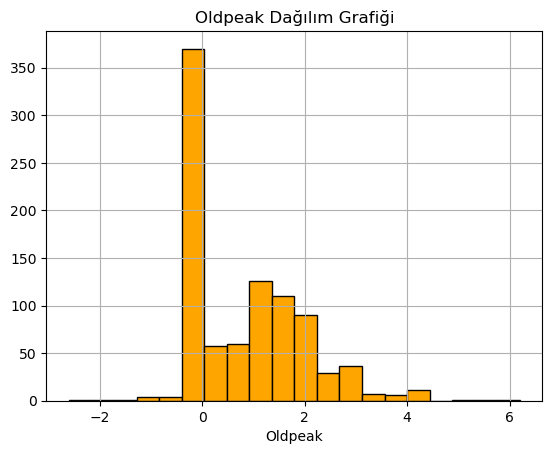

In [26]:
def num_summary(dataframe, numerical_col, plot=True):
    # Çoklu çeyreklik analizi (Hassas dağılım kontrolü)
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    # Histogram ile görselleştirme
    if plot:
        dataframe[numerical_col].hist(bins=20, color="orange", edgecolor="black")
        plt.xlabel(numerical_col)
        plt.title(f"{numerical_col} Dağılım Grafiği")
        plt.show(block=True)

# num_cols listesindeki tüm değişkenlerin otomatik analizi
for col in num_cols:
    num_summary(df, col)

In [28]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

# Tüm kategorik değişkenler için hedef değişken analizi
for col in cat_cols:
    target_summary_with_cat(df, "HeartDisease", col)

     TARGET_MEAN
Sex             
F          0.259
M          0.632


               TARGET_MEAN
ChestPainType             
ASY                  0.790
ATA                  0.139
NAP                  0.355
TA                   0.435


            TARGET_MEAN
RestingECG             
LVH               0.564
Normal            0.516
ST                0.657


                TARGET_MEAN
ExerciseAngina             
N                     0.351
Y                     0.852


          TARGET_MEAN
ST_Slope             
Down            0.778
Flat            0.828
Up              0.197


           TARGET_MEAN
FastingBS             
0                0.480
1                0.794


              TARGET_MEAN
HeartDisease             
0                   0.000
1                   1.000


                        TARGET_MEAN
Cholesterol_Is_Missing             
0                             0.477
1                             0.884




In [29]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

# Tüm sayısal değişkenler için hedef değişken analizi
for col in num_cols:
    target_summary_with_num(df, "HeartDisease", col)

                Age
HeartDisease       
0            50.551
1            55.900


              RestingBP
HeartDisease           
0               130.180
1               134.441


              Cholesterol
HeartDisease             
0                 238.571
1                 246.232


               MaxHR
HeartDisease        
0            148.151
1            127.656


              Oldpeak
HeartDisease         
0               0.408
1               1.274




# Aykırı dğer analizi

In [12]:
# 1. Eşik Değerlerin Belirlenmesi
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


# 3. Aykırı Değerleri Eşik Değerler ile Değiştirme (Baskılama)
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [13]:
def count_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    # Alt ve üst limitlerin dışındaki satırları sayalım
    outlier_count = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].shape[0]
    return outlier_count

# Tüm sayısal değişkenlerdeki aykırı değer sayılarını görelim
print("--- Değişken Bazlı Aykırı Değer Sayıları ---")
for col in num_cols:
    n_outliers = count_outliers(df, col)
    if n_outliers > 0:
        print(f"{col}: {n_outliers} adet aykırı değer tespit edildi.")
    else:
        print(f"{col}: Aykırı değer bulunmuyor.")

--- Değişken Bazlı Aykırı Değer Sayıları ---
Age: Aykırı değer bulunmuyor.
RestingBP: Aykırı değer bulunmuyor.
Cholesterol: 1 adet aykırı değer tespit edildi.
MaxHR: Aykırı değer bulunmuyor.
Oldpeak: Aykırı değer bulunmuyor.


In [14]:
# 2. Aykırı Değer Kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [15]:
check_outlier(df, "Cholesterol")

True

In [16]:
# Uygulama
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [17]:
check_outlier(df, "Cholesterol")

False

In [39]:
cat_cols

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS',
 'HeartDisease',
 'Cholesterol_Is_Missing']

In [40]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_Is_Missing
0,40,M,ATA,140,289.000,0,Normal,172,N,0.000,Up,0,0
1,49,F,NAP,160,180.000,0,Normal,156,N,1.000,Flat,1,0
2,37,M,ATA,130,283.000,0,ST,98,N,0.000,Up,0,0
3,48,F,ASY,138,214.000,0,Normal,108,Y,1.500,Flat,1,0
4,54,M,NAP,150,195.000,0,Normal,122,N,0.000,Up,0,0


# Encoding

In [18]:
# 1. ST_Slope'u genel listeden ayırma
ohe_cols = [col for col in cat_cols if col not in ["ST_Slope", "HeartDisease"]]

# 2. Optimize edilmiş One-Hot Encoding (Drop First ile)
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

# Çıktı Kontrolü:
# Sex_M: 0/1 (İki sınıflıydı, drop_first ile tek sütuna düştü - Optimizasyon sağlandı)
# ChestPainType: 3 Yeni sütun (Orijinalde 4 sınıftı)

In [19]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,FastingBS_1
0,40,140.000,289.000,172,0.000,Up,0,1,1,0,0,1,0,0,0
1,49,160.000,180.000,156,1.000,Flat,1,0,0,1,0,1,0,0,0
2,37,130.000,283.000,98,0.000,Up,0,1,1,0,0,0,1,0,0
3,48,138.000,214.000,108,1.500,Flat,1,0,0,0,0,1,0,1,0
4,54,150.000,195.000,122,0.000,Up,0,1,0,1,0,1,0,0,0


In [19]:
# ST_Slope için özel hiyerarşik sözlük oluşturma
# Up: 0 (Düşük Risk), Flat: 1 (Orta Risk), Down: 2 (Yüksek Risk)
slope_mapping = {"Up": 0, "Flat": 1, "Down": 2}

# Manuel Mapping (Ordinal Encoding) uygulaması
df["ST_Slope"] = df["ST_Slope"].map(slope_mapping)

# Kontrol: Değerlerin hiyerarşik olarak atanıp atanmadığı
print(df["ST_Slope"].value_counts())

1    460
0    395
2     63
Name: ST_Slope, dtype: int64


In [21]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,FastingBS_1
0,40,140.000,289.000,172,0.000,0,0,1,1,0,0,1,0,0,0
1,49,160.000,180.000,156,1.000,1,1,0,0,1,0,1,0,0,0
2,37,130.000,283.000,98,0.000,0,0,1,1,0,0,0,1,0,0
3,48,138.000,214.000,108,1.500,1,1,0,0,0,0,1,0,1,0
4,54,150.000,195.000,122,0.000,0,0,1,0,1,0,1,0,0,0


In [45]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)


In [46]:
cat_cols

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS',
 'HeartDisease',
 'Cholesterol_Is_Missing']

In [20]:
# Değişken türlerinin ayrıştırılması
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=20)

In [23]:
cat_cols

['ST_Slope',
 'HeartDisease',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'FastingBS_1']

In [49]:
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [50]:
cat_but_car

[]

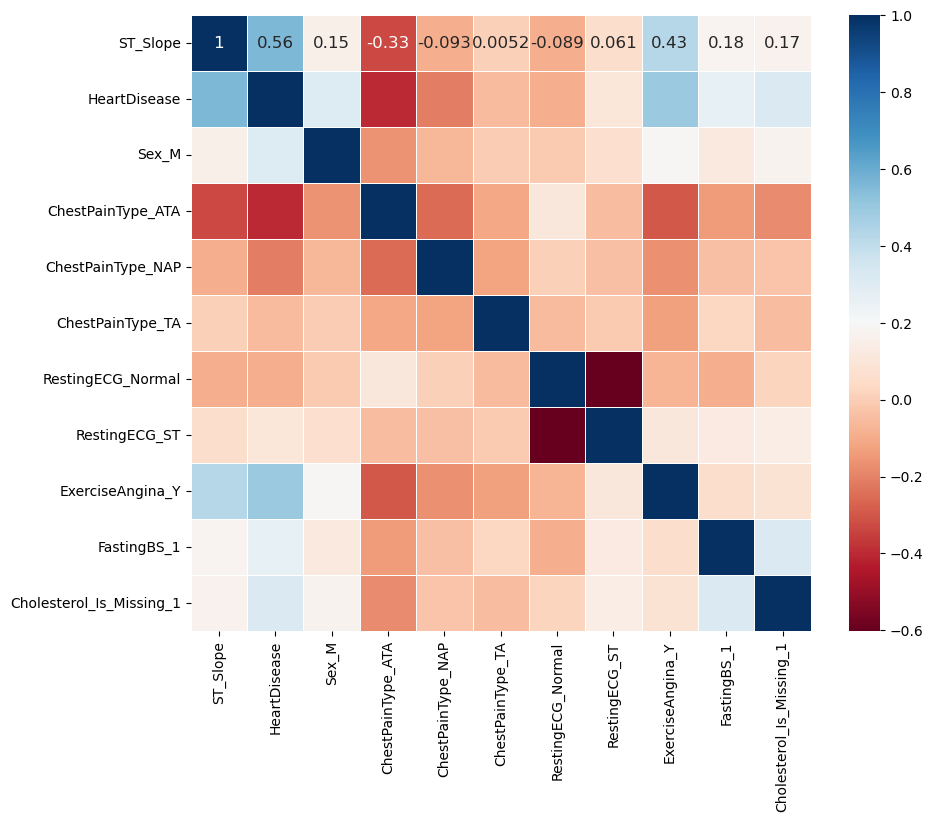

In [51]:
correlation_matrix(df, c_cols)

# Scaler

In [24]:
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [25]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,FastingBS_1
0,40,140.000,289.000,172,0.000,0,0,1,1,0,0,1,0,0,0
1,49,160.000,180.000,156,1.000,1,1,0,0,1,0,1,0,0,0
2,37,130.000,283.000,98,0.000,0,0,1,1,0,0,0,1,0,0
3,48,138.000,214.000,108,1.500,1,1,0,0,0,0,1,0,1,0
4,54,150.000,195.000,122,0.000,0,0,1,0,1,0,1,0,0,0


In [27]:
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

# Sayısal kolonların seçilmesi
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Model Eğitimi

In [23]:
# 1. Eksik değerlerin kontrolü
print(X_test.isnull().sum())

Age                         0
RestingBP                   0
Cholesterol                 0
MaxHR                       0
Oldpeak                     0
ST_Slope                    0
Sex_M                       0
ChestPainType_ATA           0
ChestPainType_NAP           0
ChestPainType_TA            0
RestingECG_Normal           0
RestingECG_ST               0
ExerciseAngina_Y            0
FastingBS_1                 0
Cholesterol_Is_Missing_1    0
dtype: int64


In [34]:
# 1. Eksik değer tespiti
print(X_test.isnull().sum()) 
# Çıktı: RestingBP: 1 adet NaN

# 2. Eğitim setinin medyanı ile doldurma (Veri sızıntısını önler)
median_value = X_train['RestingBP'].median()
X_test['RestingBP'] = X_test['RestingBP'].fillna(median_value)

# 3. Modelin tekrar çalıştırılması

Age                  0
RestingBP            1
Cholesterol          0
MaxHR                0
Oldpeak              0
ST_Slope             0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
FastingBS_1          0
dtype: int64


In [24]:
from sklearn.linear_model import LogisticRegression

# 1. Modelin tanımlanması ve iterasyon sınırının belirlenmesi
log_model = LogisticRegression(max_iter=1000)

# 2. Modelin eğitilmesi
log_model.fit(X_train, y_train)

# 3. Modelin ilk katsayı kontrolleri
print(f"Model Katsayıları: {log_model.coef_}")
print(f"Sabit Değer (Intercept): {log_model.intercept_}")

Model Katsayıları: [[ 0.04365403  0.05173479  0.08572481 -0.20272071  0.21616719  1.09168719
   1.10460801 -1.4911264  -1.5090441  -1.06235766 -0.26117412 -0.27132612
   1.0228449   0.72830676  1.59383334]]
Sabit Değer (Intercept): [-0.43802068]


In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Önce tahmin yapmalısın
y_pred = log_model.predict(X_test)

# Sonra bu tahminleri (y_pred) gerçek test sonuçlarıyla (y_test) kıyaslamalısın
print("Accuracy Score:", accuracy_score(y_test, y_pred)) # y_train değil y_pred olmalı
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8804347826086957
Confusion Matrix:
 [[69 13]
 [ 9 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [31]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. XGBoost Sınıflandırıcı Nesnesini Oluşturma
# scale_pos_weight: Eğer veri setinde dengesizlik varsa kullanılabilir.
# n_estimators: Ağaç sayısı.
# learning_rate: Öğrenme oranı (adım büyüklüğü).
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 2. Modeli Eğitme
xgb_model.fit(X_train, y_train)

# 3. Tahmin Yapma
y_pred_xgb = xgb_model.predict(X_test)

# 4. Sonuçları Görüntüleme
print("--- XGBoost Model Performansı ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

C:\Users\VICTUS\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:38:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost Model Performansı ---
Accuracy Score: 0.8641304347826086

Confusion Matrix:
[[70 12]
 [13 89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.88      0.87      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



# Ki kare

In [32]:
from scipy.stats import chi2_contingency
import pandas as pd

# 1. Kontenjans Tablosunun Oluşturulması (Örn: Cinsiyet vs Kalp Hastalığı)
contingency_table = pd.crosstab(df['New_Feature'], df['HeartDisease'])

# 2. Ki-Kare Testinin Uygulanması
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-Kare İstatistiği: {chi2}")
print(f"P-Value Değeri: {p}")

KeyError: 'New_Feature'

In [33]:
from scipy.stats import chi2_contingency
df['HighChol'] = (df['Cholesterol'] > 200).astype(int)
cont_table = pd.crosstab(df['HighChol'], df['HeartDisease'])
chi2, p, dof, exp = chi2_contingency(cont_table)
p

2.4335438324782124e-05

HighChol
0   0.393
1   0.585
Name: HeartDisease, dtype: float64


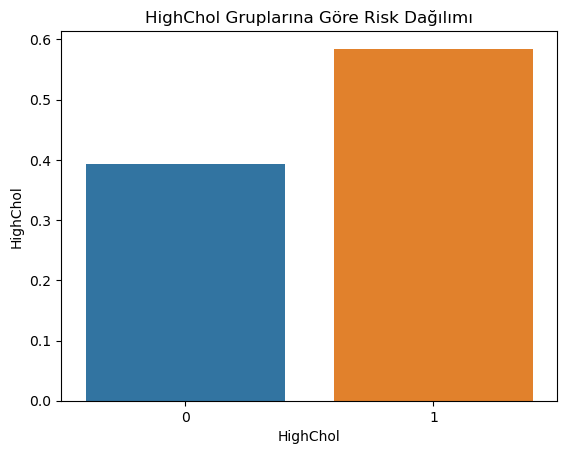

In [41]:
# Her grubun içindeki hastalık oranını hesapla
HighChol_analysis = df.groupby('HighChol')['HeartDisease'].mean().sort_values()
print(HighChol_analysis)

#Görselleştirilmesi
sns.barplot(x=HighChol_analysis.index, y=HighChol_analysis.values)
plt.ylabel("HighChol")
plt.title("HighChol Gruplarına Göre Risk Dağılımı")
plt.show()

In [34]:
df['HighResting'] = (df['RestingBP'] > 140).astype(int)
cont_table = pd.crosstab(df['HighResting'], df['HeartDisease'])
chi2, p, dof, exp = chi2_contingency(cont_table)
p

1.5821454928647765e-05

HighResting
0   0.513
1   0.682
Name: HeartDisease, dtype: float64


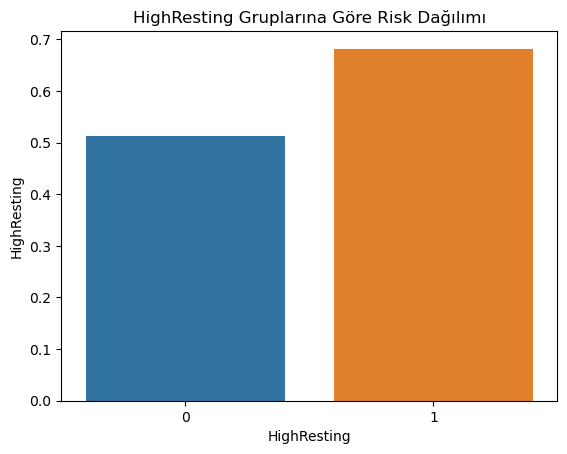

In [43]:
# Her grubun içindeki hastalık oranını hesapla
HighResting_analysis = df.groupby('HighResting')['HeartDisease'].mean().sort_values()
print(HighResting_analysis)

#Görselleştirilmesi
sns.barplot(x=HighResting_analysis.index, y=HighResting_analysis.values)
plt.ylabel("HighResting")
plt.title("HighResting Gruplarına Göre Risk Dağılımı")
plt.show()

In [35]:
df['HighHR'] = (df['MaxHR'] > 130).astype(int)
cont_table = pd.crosstab(df['HighHR'], df['HeartDisease'])
chi2, p, dof, exp = chi2_contingency(cont_table)
p

4.2763042704950585e-29

HighHR
1   0.393
0   0.766
Name: HeartDisease, dtype: float64


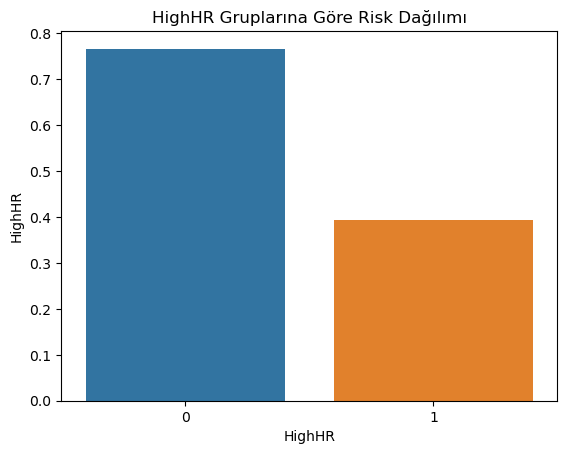

In [45]:
# Her grubun içindeki hastalık oranını hesapla
HighHR_analysis = df.groupby('HighHR')['HeartDisease'].mean().sort_values()
print(HighHR_analysis)

#Görselleştirilmesi
sns.barplot(x=HighHR_analysis.index, y=HighHR_analysis.values)
plt.ylabel("HighHR")
plt.title("HighHR Gruplarına Göre Risk Dağılımı")
plt.show()

In [36]:
df['AgeGroup_Optimized'] = pd.cut(
    df['Age'],
    bins=[0, 45, 55, 120], # 55 ve üstünü tek bir 'Riskli' grupta topladık
    labels=['Young', 'Middle', 'Senior+']
)
table = pd.crosstab(df['AgeGroup_Optimized'], df['HeartDisease'])
chi2, p, dof, exp = chi2_contingency(table)
p

7.595823230865986e-20

AgeGroup_Optimized
Young     0.311
Middle    0.506
Senior+   0.707
Name: HeartDisease, dtype: float64


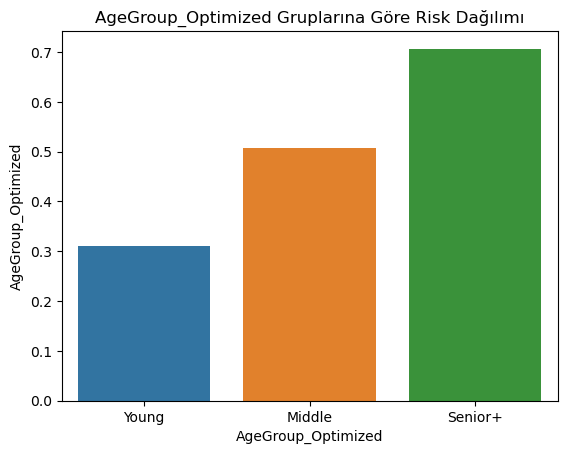

In [47]:
# Her grubun içindeki hastalık oranını hesapla
AgeGroup_Optimized_analysis = df.groupby('AgeGroup_Optimized')['HeartDisease'].mean().sort_values()
print(AgeGroup_Optimized_analysis)

#Görselleştirilmesi
sns.barplot(x=AgeGroup_Optimized_analysis.index, y=AgeGroup_Optimized_analysis.values)
plt.ylabel("AgeGroup_Optimized")
plt.title("AgeGroup_Optimized Gruplarına Göre Risk Dağılımı")
plt.show()

In [49]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,FastingBS_1,HighChol,HighResting,HighHR,AgeGroup_Optimized
0,40,140.000,289.000,172,0.000,0,0,1,1,0,0,1,0,0,0,1,0,1,Young
1,49,160.000,180.000,156,1.000,1,1,0,0,1,0,1,0,0,0,0,1,1,Middle
2,37,130.000,283.000,98,0.000,0,0,1,1,0,0,0,1,0,0,1,0,0,Young
3,48,138.000,214.000,108,1.500,1,1,0,0,0,0,1,0,1,0,1,0,0,Middle
4,54,150.000,195.000,122,0.000,0,0,1,0,1,0,1,0,0,0,0,1,0,Middle


In [37]:
df['MetabolicRisk'] = (
    (df['FastingBS_1'] == 1) & (df['HighChol'] == 1)
).astype(int)
table = pd.crosstab(df['MetabolicRisk'], df['HeartDisease'])
chi2, p, dof, exp = chi2_contingency(table)
p

5.570379596518548e-17

MetabolicRisk
0   0.481
1   0.821
Name: HeartDisease, dtype: float64


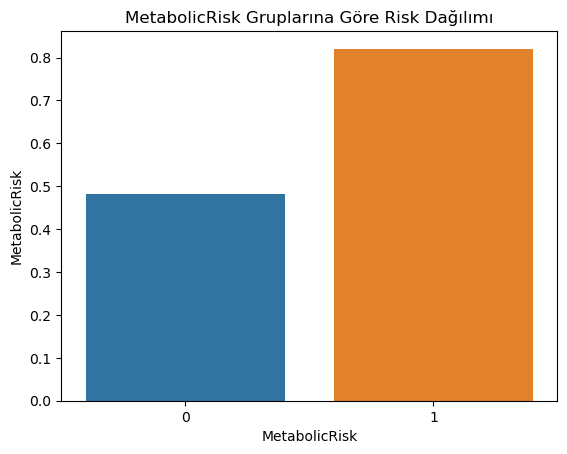

In [52]:
# Her grubun içindeki hastalık oranını hesapla
MetabolicRisk_Optimized_analysis = df.groupby('MetabolicRisk')['HeartDisease'].mean().sort_values()
print(MetabolicRisk_Optimized_analysis)

#Görselleştirilmesi
sns.barplot(x=MetabolicRisk_Optimized_analysis.index, y=MetabolicRisk_Optimized_analysis.values)
plt.ylabel("MetabolicRisk")
plt.title("MetabolicRisk Gruplarına Göre Risk Dağılımı")
plt.show()

# Mann whit

In [ ]:
from scipy.stats import shapiro, mannwhitneyu

# Normallik kontrolü
stat, p_norm = shapiro(df['Numeric_Feature'])

# Dağılım normal değilse Mann-Whitney U uygulanması
stat, p_value = mannwhitneyu(group_h, group_s)

In [54]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,FastingBS_1,HighChol,HighResting,HighHR,AgeGroup_Optimized,MetabolicRisk
0,40,140.000,289.000,172,0.000,0,0,1,1,0,0,1,0,0,0,1,0,1,Young,0
1,49,160.000,180.000,156,1.000,1,1,0,0,1,0,1,0,0,0,0,1,1,Middle,0
2,37,130.000,283.000,98,0.000,0,0,1,1,0,0,0,1,0,0,1,0,0,Young,0
3,48,138.000,214.000,108,1.500,1,1,0,0,0,0,1,0,1,0,1,0,0,Middle,0
4,54,150.000,195.000,122,0.000,0,0,1,0,1,0,1,0,0,0,0,1,0,Middle,0


In [38]:
from scipy.stats import shapiro, mannwhitneyu
# One-hot encoded sütun kullanılarak StressScore oluşturuldu
df['StressScore'] = df['Oldpeak'] * df['ExerciseAngina_Y']

# Grupların ayrılması
group_h = df[df['HeartDisease'] == 1]['StressScore'] # Hasta
group_s = df[df['HeartDisease'] == 0]['StressScore'] # Sağlıklı

# Shapiro-Wilk Testi
print("Hasta Grubu Normallik p:", shapiro(group_h).pvalue)
print("Sağlıklı Grubu Normallik p:", shapiro(group_s).pvalue)

Hasta Grubu Normallik p: 2.0147604707008165e-22
Sağlıklı Grubu Normallik p: 1.7911494725580683e-36


In [56]:
stat, p = mannwhitneyu(group_h, group_s)
print(f"Mann-Whitney U p-değeri: {p}")

Mann-Whitney U p-değeri: 6.948356344858309e-44


In [63]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,FastingBS_1,HighChol,HighResting,HighHR,AgeGroup_Optimized,MetabolicRisk,StressScore,RPP
0,40,140.000,289.000,172,0.000,0,0,1,1,0,0,1,0,0,0,1,0,1,Young,0,0.000,240.800
1,49,160.000,180.000,156,1.000,1,1,0,0,1,0,1,0,0,0,0,1,1,Middle,0,0.000,249.600
2,37,130.000,283.000,98,0.000,0,0,1,1,0,0,0,1,0,0,1,0,0,Young,0,0.000,127.400
3,48,138.000,214.000,108,1.500,1,1,0,0,0,0,1,0,1,0,1,0,0,Middle,0,1.500,149.040
4,54,150.000,195.000,122,0.000,0,0,1,0,1,0,1,0,0,0,0,1,0,Middle,0,0.000,183.000


In [39]:
# Eğer RPP p-value: nan bu sonuç çıkıyorsa RestingBP Nan değeri var düzeltmek gerekiyor.
# df['RestingBP'] = df['RestingBP'].fillna(df['RestingBP'].median())
df['RPP'] = (df['RestingBP'] * df['MaxHR']) / 100

g1 = df[df['HeartDisease']==1]['RPP']
g0 = df[df['HeartDisease']==0]['RPP']

# Shapiro-Wilk Testi
print("Hasta Grubu Normallik p:", shapiro(g1).pvalue)
print("Sağlıklı Grubu Normallik p:", shapiro(g0).pvalue)


stat, p = mannwhitneyu(g1, g0)
print("RPP p-value:", p)

Hasta Grubu Normallik p: 8.945269200921757e-07
Sağlıklı Grubu Normallik p: 0.8852479457855225
RPP p-value: 1.9337150544417805e-18


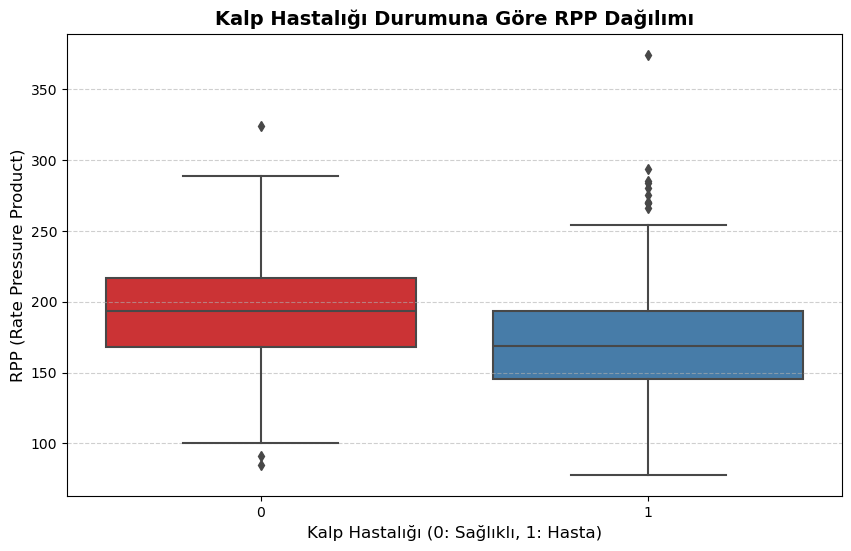

In [68]:
# 2. Kutu Grafiği (Box Plot) Oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='RPP', data=df, palette='Set1')

# 3. Grafik detaylarını ve etiketleri ekleme
plt.title('Kalp Hastalığı Durumuna Göre RPP Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Kalp Hastalığı (0: Sağlıklı, 1: Hasta)', fontsize=12)
plt.ylabel('RPP (Rate Pressure Product)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 4. Grafiği kaydetme (Staj defterine eklemek için)
plt.savefig('rpp_distribution_boxplot.png', bbox_inches='tight')
plt.show()

In [41]:
df['DTS_Simulated'] = 1 - (5 * df['Oldpeak']) - (4 * df['ExerciseAngina_Y'])

g1 = df[df['HeartDisease']==1]['DTS_Simulated']
g0 = df[df['HeartDisease']==0]['DTS_Simulated']

# Shapiro-Wilk Testi-
print("Hasta Grubu Normallik p:", shapiro(g1).pvalue)
print("Sağlıklı Grubu Normallik p:", shapiro(g0).pvalue)


stat, p = mannwhitneyu(g1, g0)
print("DTS_Simulated p-value:", p)

Hasta Grubu Normallik p: 2.32882868544948e-08
Sağlıklı Grubu Normallik p: 1.228382154135885e-25
DTS_Simulated p-value: 7.7643172701898815e-53


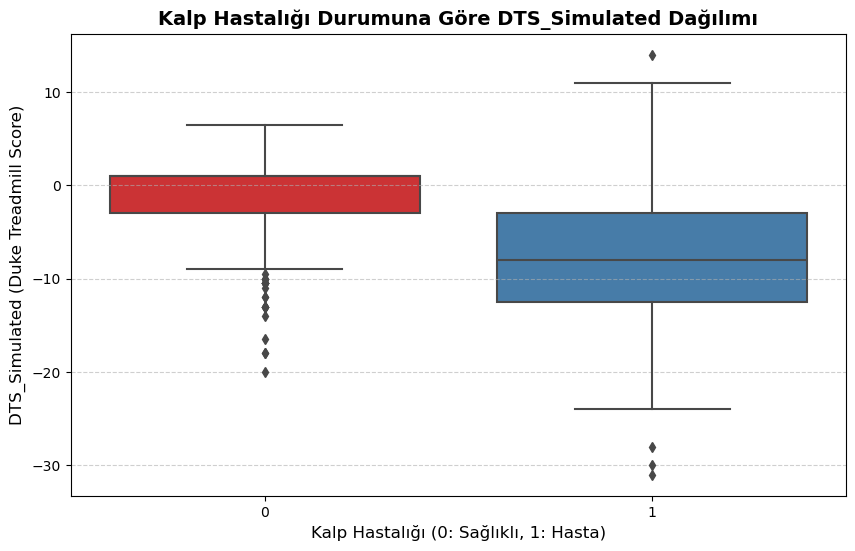

In [71]:
# 2. Kutu Grafiği (Box Plot) Oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='DTS_Simulated', data=df, palette='Set1')

# 3. Grafik detaylarını ve etiketleri ekleme
plt.title('Kalp Hastalığı Durumuna Göre DTS_Simulated Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Kalp Hastalığı (0: Sağlıklı, 1: Hasta)', fontsize=12)
plt.ylabel('DTS_Simulated (Duke Treadmill Score)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)


In [42]:
df['HR_Efficiency'] = df['MaxHR'] / (220 - df['Age'])


g1 = df[df['HeartDisease']==1]['HR_Efficiency']
g0 = df[df['HeartDisease']==0]['HR_Efficiency']

# Shapiro-Wilk Testi
print("Hasta Grubu Normallik p:", shapiro(g1).pvalue)
print("Sağlıklı Grubu Normallik p:", shapiro(g0).pvalue)


stat, p = mannwhitneyu(g1, g0)
print("HR_Efficiency p-value:", p)

Hasta Grubu Normallik p: 0.4273194968700409
Sağlıklı Grubu Normallik p: 6.98006715538213e-07
HR_Efficiency p-value: 9.184904926714106e-26


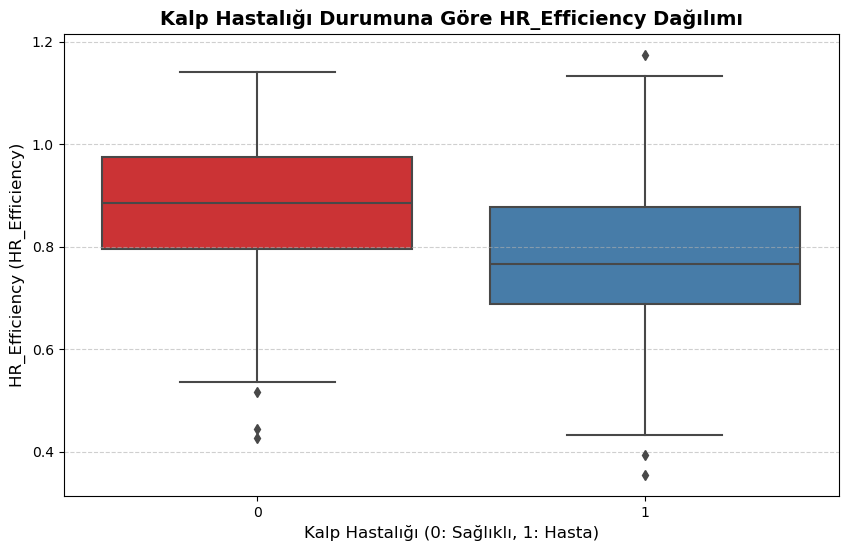

In [43]:
# 2. Kutu Grafiği (Box Plot) Oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='HR_Efficiency', data=df, palette='Set1')

# 3. Grafik detaylarını ve etiketleri ekleme
plt.title('Kalp Hastalığı Durumuna Göre HR_Efficiency Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Kalp Hastalığı (0: Sağlıklı, 1: Hasta)', fontsize=12)
plt.ylabel('HR_Efficiency (HR_Efficiency)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)


In [44]:
df['Age_Oldpeak'] = df['Age'] * df['Oldpeak']

g1 = df[df['HeartDisease'] == 1]['Age_Oldpeak']
g0 = df[df['HeartDisease'] == 0]['Age_Oldpeak']

# Shapiro-Wilk Testi
print("Hasta Grubu Normallik p:", shapiro(g1).pvalue)
print("Sağlıklı Grubu Normallik p:", shapiro(g0).pvalue)


stat, p = mannwhitneyu(g1, g0)
print("Age_Oldpeak p-value:", p)

Hasta Grubu Normallik p: 4.1682813884530434e-13
Sağlıklı Grubu Normallik p: 2.67080029856251e-27
Age_Oldpeak p-value: 1.6895065937164684e-37


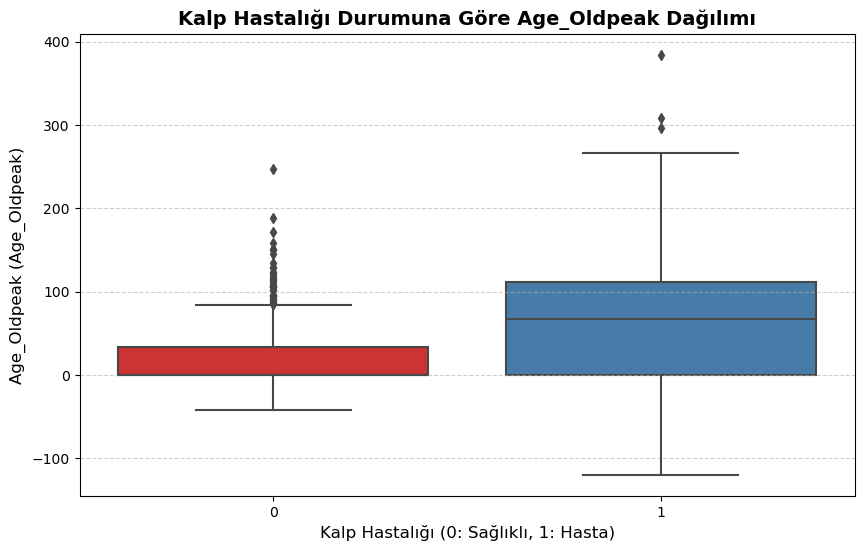

In [45]:
# 2. Kutu Grafiği (Box Plot) Oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Age_Oldpeak', data=df, palette='Set1')

# 3. Grafik detaylarını ve etiketleri ekleme
plt.title('Kalp Hastalığı Durumuna Göre Age_Oldpeak Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Kalp Hastalığı (0: Sağlıklı, 1: Hasta)', fontsize=12)
plt.ylabel('Age_Oldpeak (Age_Oldpeak)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
